In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [326]:
df = pd.read_csv("pokeman_train.csv")

In [327]:
def scat(x,y,title, xlabel, ylabel):
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def heat(data):
    corrmat = data.corr()
    top_corr_features = corrmat.index

    #print(corrmat)
    plt.figure(figsize=(20,20))

    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    
def multiplescat(data, col):
    for col in data:
        scat(data[col], data['is_legendary'], col +" v. Legendary", col, "Legendary")
        
def droprow(data,atb, value):
#     print('TEST')
    value = data[atb] >value
#     value = value.drop(value.index[1])
#     data = data.drop(data.index[1])
    k = -1
    for i in value:
        k = k+1
        if (i == True):
            value = value.drop(value.index[k])
            #print(data.iloc[k,4])
            data = data.drop(data.index[k])
            k = k -1
            #print(k)
    return data

In [328]:
df.head()


,Unnamed: 0,rowid,unique_id,types,abilities,base_happiness,height_m,weight_kg,poke_stats,is_legendary
0,0,1,665,"fighting, nan","['Guts', 'Sheer Force', 'Iron Fist']",70.0,0.6,12.5,"nan, 80.0, 55.0, 25.0, 35.0, 35.0",0
1,1,2,288,"dragon, nan","['Bulletproof', 'Soundproof', 'Overcoat']",70.0,0.6,29.7,"nan, nan, 65.0, 45.0, 45.0, 45.0",0
2,2,3,349,"poison, fire","['Corrosion', 'Oblivious']",70.0,1.2,22.2,"nan, 64.0, 60.0, 111.0, 60.0, 117.0",0
3,3,4,260,"ground, nan","['Rock Head', 'Lightningrod', 'Battle Armor']",70.0,0.4,6.5,"nan, 50.0, 95.0, 40.0, 50.0, 35.0",0
4,4,5,536,"water, nan","['Torrent', 'Sheer Force']",70.0,0.6,9.5,"nan, 65.0, 64.0, 44.0, 48.0, 43.0",0


In [329]:
#poke stats:  hp, atk, def, sp_atk, sp_def, speed


In [330]:
type(df["poke_stats"][0])

str

In [331]:
df["poke_stats"] = df["poke_stats"].apply(lambda x : x.split(","))

In [332]:
df["poke_stats"]

0           [nan,  80.0,  55.0,  25.0,  35.0,  35.0]
1            [nan,  nan,  65.0,  45.0,  45.0,  45.0]
2         [nan,  64.0,  60.0,  111.0,  60.0,  117.0]
3           [nan,  50.0,  95.0,  40.0,  50.0,  35.0]
4           [nan,  65.0,  64.0,  44.0,  48.0,  43.0]
5       [nan,  120.0,  100.0,  150.0,  120.0,  90.0]
6           [nan,  70.0,  50.0,  50.0,  50.0,  70.0]
7           [nan,  92.0,  87.0,  75.0,  85.0,  76.0]
8           [nan,  82.0,  95.0,  55.0,  75.0,  36.0]
9        [109,  53.0,  47.0,  127.0,  131.0,  103.0]
10            [74,  nan,  72.0,  90.0,  72.0,  46.0]
11          [nan,  nan,  70.0,  80.0,  140.0,  70.0]
12         [nan,  110.0,  60.0,  55.0,  60.0,  45.0]
13            [nan,  140.0,  nan,  nan,  nan,  30.0]
14          [nan,  50.0,  50.0,  65.0,  60.0,  44.0]
15          [nan,  nan,  230.0,  10.0,  230.0,  5.0]
16           [nan,  nan,  43.0,  46.0,  41.0,  60.0]
17          [nan,  75.0,  70.0,  35.0,  70.0,  48.0]
18           [43,  80.0,  65.0,  50.0,  35.0, 

In [333]:
hp_ = [] 
atk_ = []
def_ = []
sp_atk_ = []
sp_def_ = []
speed_ =[]

for row in df["poke_stats"]:
    hp_val = row[0]
    atk_val = row[1]
    def_val = row[2]
    satk_val = row[3]
    sdef_val = row[4]
    spd_val = row[5]
    
    hp_.append(hp_val)
    atk_.append(atk_val)
    def_.append(def_val)
    sp_atk_.append(satk_val)
    sp_def_.append(sdef_val)
    speed_.append(spd_val)
    
        

In [334]:
df["hp_stat"] = hp_
df["atk_stat"] = atk_
df["def_stat"] = def_
df["sp_atk_stat"] = sp_atk_
df["sp_def_stat"] = sp_def_
df["speed_stat"] = speed_

In [335]:
df

,Unnamed: 0,rowid,unique_id,types,abilities,base_happiness,height_m,weight_kg,poke_stats,is_legendary,hp_stat,atk_stat,def_stat,sp_atk_stat,sp_def_stat,speed_stat
0,0,1,665,"fighting, nan","['Guts', 'Sheer Force', 'Iron Fist']",70.0,0.6,12.5,"[nan, 80.0, 55.0, 25.0, 35.0, 35.0]",0,nan,80.0,55.0,25.0,35.0,35.0
1,1,2,288,"dragon, nan","['Bulletproof', 'Soundproof', 'Overcoat']",70.0,0.6,29.7,"[nan, nan, 65.0, 45.0, 45.0, 45.0]",0,nan,nan,65.0,45.0,45.0,45.0
2,2,3,349,"poison, fire","['Corrosion', 'Oblivious']",70.0,1.2,22.2,"[nan, 64.0, 60.0, 111.0, 60.0, 117.0]",0,nan,64.0,60.0,111.0,60.0,117.0
3,3,4,260,"ground, nan","['Rock Head', 'Lightningrod', 'Battle Armor']",70.0,0.4,6.5,"[nan, 50.0, 95.0, 40.0, 50.0, 35.0]",0,nan,50.0,95.0,40.0,50.0,35.0
4,4,5,536,"water, nan","['Torrent', 'Sheer Force']",70.0,0.6,9.5,"[nan, 65.0, 64.0, 44.0, 48.0, 43.0]",0,nan,65.0,64.0,44.0,48.0,43.0
5,5,6,293,"dragon, fire",['Turboblaze'],0.0,3.2,330.0,"[nan, 120.0, 100.0, 150.0, 120.0, 90.0]",1,nan,120.0,100.0,150.0,120.0,90.0
6,6,7,181,"ground, dragon",['Levitate'],70.0,1.1,15.3,"[nan, 70.0, 50.0, 50.0, 50.0, 70.0]",0,nan,70.0,50.0,50.0,50.0,70.0
7,7,8,554,"poison, ground","['Poison Point', 'Rivalry', 'Sheer Force']",70.0,1.3,60.0,"[nan, 92.0, 87.0, 75.0, 85.0, 76.0]",0,nan,92.0,87.0,75.0,85.0,76.0
8,8,9,507,"bug, electric",['Battery'],70.0,0.5,10.5,"[nan, 82.0, 95.0, 55.0, 75.0, 36.0]",0,nan,82.0,95.0,55.0,75.0,36.0
9,9,10,140,"rock, poison",['Beast Boost'],0.0,1.2,55.5,"[109, 53.0, 47.0, 127.0, 131.0, 103.0]",1,109,53.0,47.0,127.0,131.0,103.0


In [336]:
df.drop(columns=["poke_stats","Unnamed: 0"], inplace=True)

In [337]:
df

,rowid,unique_id,types,abilities,base_happiness,height_m,weight_kg,is_legendary,hp_stat,atk_stat,def_stat,sp_atk_stat,sp_def_stat,speed_stat
0,1,665,"fighting, nan","['Guts', 'Sheer Force', 'Iron Fist']",70.0,0.6,12.5,0,nan,80.0,55.0,25.0,35.0,35.0
1,2,288,"dragon, nan","['Bulletproof', 'Soundproof', 'Overcoat']",70.0,0.6,29.7,0,nan,nan,65.0,45.0,45.0,45.0
2,3,349,"poison, fire","['Corrosion', 'Oblivious']",70.0,1.2,22.2,0,nan,64.0,60.0,111.0,60.0,117.0
3,4,260,"ground, nan","['Rock Head', 'Lightningrod', 'Battle Armor']",70.0,0.4,6.5,0,nan,50.0,95.0,40.0,50.0,35.0
4,5,536,"water, nan","['Torrent', 'Sheer Force']",70.0,0.6,9.5,0,nan,65.0,64.0,44.0,48.0,43.0
5,6,293,"dragon, fire",['Turboblaze'],0.0,3.2,330.0,1,nan,120.0,100.0,150.0,120.0,90.0
6,7,181,"ground, dragon",['Levitate'],70.0,1.1,15.3,0,nan,70.0,50.0,50.0,50.0,70.0
7,8,554,"poison, ground","['Poison Point', 'Rivalry', 'Sheer Force']",70.0,1.3,60.0,0,nan,92.0,87.0,75.0,85.0,76.0
8,9,507,"bug, electric",['Battery'],70.0,0.5,10.5,0,nan,82.0,95.0,55.0,75.0,36.0
9,10,140,"rock, poison",['Beast Boost'],0.0,1.2,55.5,1,109,53.0,47.0,127.0,131.0,103.0


In [338]:
a = df["abilities"][0]

In [339]:
a = a.replace("[","").replace("]","").replace("'","").split(",")
a

['Guts', ' Sheer Force', ' Iron Fist']

In [340]:
print(len(a[2]))

10


In [341]:
a

['Guts', ' Sheer Force', ' Iron Fist']

In [342]:
# find max abilities
row_num_abil=[]


for row in df["abilities"]:
    row = row.replace("[","").replace("]","").replace("'","").split(",")
    num_row = len(row)  
    row_num_abil.append(num_row)

In [343]:
ability_max = max(row_num_abil)

In [344]:
ability_max

6

In [345]:
ability_min = min(row_num_abil)

In [346]:
ability_min

1

In [347]:
row_num_abil

[3,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 6,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 3,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 6,
 3,
 3,
 6,
 3,
 2,
 1,
 3,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 1,
 1,
 3,
 2,
 6,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 1,
 3,
 3,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 1,
 2,
 3,
 6,
 2,
 3,
 2,
 3,
 3,
 1,
 1,
 3,
 3,
 3,
 6,
 2,
 3,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 2,
 2,


In [348]:
df["abilities"][0]

"['Guts', 'Sheer Force', 'Iron Fist']"

In [349]:
abil_1=[]
abil_2=[]
abil_3=[]
abil_4=[]
abil_5=[]
abil_6=[]

for row in df["abilities"]:
    row = row.replace("[","").replace("]","").replace("'","").split(",")
    
    row_len = len(row)
    
    if row_len == 1:
        val_1 = row[0]
        val_2 = "None"
        val_3 = "None"
        val_4 = "None"
        val_5 = "None"   
        val_6 = "None"
    
    elif row_len == 2:
        val_1 = row[0]
        val_2 = row[1]
        val_3 = "None"
        val_4 = "None"
        val_5 = "None"   
        val_6 = "None"
    
    elif row_len == 3:
        val_1 = row[0]
        val_2 = row[1]
        val_3 = row[2]
        val_4 = "None"
        val_5 = "None"  
        val_6 = "None"
        
    elif row_len == 4:
        val_1 = row[0]
        val_2 = row[1]
        val_3 = row[2]
        val_4 = row[3]
        val_5 = "None"
        val_6 = "None"
        
    elif row_len == 5:
        val_1 = row[0]
        val_2 = row[1]
        val_3 = row[2]
        val_4 = row[3]
        val_5 = row[4]   
        val_6 = "None"
     
    elif row_len == 6:
        val_1 = row[0]
        val_2 = row[1]
        val_3 = row[2]
        val_4 = row[3]
        val_5 = row[4]   
        val_6 = row[5]
    
    abil_1.append(val_1)
    abil_2.append(val_2)
    abil_3.append(val_3)
    abil_4.append(val_4)
    abil_5.append(val_5)
    abil_6.append(val_6)
    

In [350]:
df["ability_1"] = abil_1
df["ability_2"] = abil_2
df["ability_3"] = abil_3
df["ability_4"] = abil_4
df["ability_5"] = abil_5
df["ability_6"] = abil_6

In [351]:
df.head()

,rowid,unique_id,types,abilities,base_happiness,height_m,weight_kg,is_legendary,hp_stat,atk_stat,def_stat,sp_atk_stat,sp_def_stat,speed_stat,ability_1,ability_2,ability_3,ability_4,ability_5,ability_6
0,1,665,"fighting, nan","['Guts', 'Sheer Force', 'Iron Fist']",70.0,0.6,12.5,0,nan,80.0,55.0,25.0,35.0,35.0,Guts,Sheer Force,Iron Fist,None,None,None
1,2,288,"dragon, nan","['Bulletproof', 'Soundproof', 'Overcoat']",70.0,0.6,29.7,0,nan,nan,65.0,45.0,45.0,45.0,Bulletproof,Soundproof,Overcoat,None,None,None
2,3,349,"poison, fire","['Corrosion', 'Oblivious']",70.0,1.2,22.2,0,nan,64.0,60.0,111.0,60.0,117.0,Corrosion,Oblivious,None,None,None,None
3,4,260,"ground, nan","['Rock Head', 'Lightningrod', 'Battle Armor']",70.0,0.4,6.5,0,nan,50.0,95.0,40.0,50.0,35.0,Rock Head,Lightningrod,Battle Armor,None,None,None
4,5,536,"water, nan","['Torrent', 'Sheer Force']",70.0,0.6,9.5,0,nan,65.0,64.0,44.0,48.0,43.0,Torrent,Sheer Force,None,None,None,None


In [352]:
df.drop(columns=["abilities"],inplace=True)

In [353]:
df.head()

,rowid,unique_id,types,base_happiness,height_m,weight_kg,is_legendary,hp_stat,atk_stat,def_stat,sp_atk_stat,sp_def_stat,speed_stat,ability_1,ability_2,ability_3,ability_4,ability_5,ability_6
0,1,665,"fighting, nan",70.0,0.6,12.5,0,nan,80.0,55.0,25.0,35.0,35.0,Guts,Sheer Force,Iron Fist,None,None,None
1,2,288,"dragon, nan",70.0,0.6,29.7,0,nan,nan,65.0,45.0,45.0,45.0,Bulletproof,Soundproof,Overcoat,None,None,None
2,3,349,"poison, fire",70.0,1.2,22.2,0,nan,64.0,60.0,111.0,60.0,117.0,Corrosion,Oblivious,None,None,None,None
3,4,260,"ground, nan",70.0,0.4,6.5,0,nan,50.0,95.0,40.0,50.0,35.0,Rock Head,Lightningrod,Battle Armor,None,None,None
4,5,536,"water, nan",70.0,0.6,9.5,0,nan,65.0,64.0,44.0,48.0,43.0,Torrent,Sheer Force,None,None,None,None


In [354]:
df["types"]

0        fighting, nan
1          dragon, nan
2         poison, fire
3          ground, nan
4           water, nan
5         dragon, fire
6       ground, dragon
7       poison, ground
8        bug, electric
9         rock, poison
10          grass, nan
11       water, flying
12         normal, nan
13          water, nan
14            ice, nan
15           bug, rock
16       water, ground
17      dark, fighting
18          water, nan
19         dragon, nan
20       electric, nan
21          water, nan
22            bug, nan
23         poison, nan
24          fairy, nan
25        rock, ground
26           fire, nan
27           rock, nan
28         grass, dark
29       grass, poison
            ...       
490          bug, rock
491         water, nan
492         steel, nan
493         water, ice
494         grass, nan
495      bug, fighting
496           ice, nan
497        normal, nan
498         grass, nan
499        bug, poison
500       normal, dark
501      fighting, nan
502        

In [355]:
test_types = df["types"][0]

In [356]:
test_types

'fighting, nan'

In [357]:
test_types = test_types.split(",")

In [358]:
test_types

['fighting', ' nan']

In [359]:
len(test_types)

2

In [360]:
test_types.remove(" nan")

In [361]:
len(test_types)

1

In [362]:
df["types"] = df["types"].apply(lambda x :x.split(","))

In [363]:
df["types"]

0        [fighting,  nan]
1          [dragon,  nan]
2         [poison,  fire]
3          [ground,  nan]
4           [water,  nan]
5         [dragon,  fire]
6       [ground,  dragon]
7       [poison,  ground]
8        [bug,  electric]
9         [rock,  poison]
10          [grass,  nan]
11       [water,  flying]
12         [normal,  nan]
13          [water,  nan]
14            [ice,  nan]
15           [bug,  rock]
16       [water,  ground]
17      [dark,  fighting]
18          [water,  nan]
19         [dragon,  nan]
20       [electric,  nan]
21          [water,  nan]
22            [bug,  nan]
23         [poison,  nan]
24          [fairy,  nan]
25        [rock,  ground]
26           [fire,  nan]
27           [rock,  nan]
28         [grass,  dark]
29       [grass,  poison]
              ...        
490          [bug,  rock]
491         [water,  nan]
492         [steel,  nan]
493         [water,  ice]
494         [grass,  nan]
495      [bug,  fighting]
496           [ice,  nan]
497        [

In [373]:
types_v2=[]
row_len = []
for row in df["types"]:
    i = 0
   
    while (i <len(row)):
        if " nan" == row[i]:
            del row[i]
        i = 1 + i
    row_len = len(row)
    types_v2.append(row_len)
    print(row_len)
    #print(row[i])

types_v2

1
1
2
1
1
2
2
2
2
2
1
2
1
1
1
2
2
2
1
1
1
1
1
1
1
2
1
1
2
2
1
1
1
1
2
2
2
1
2
2
2
1
2
1
2
1
1
2
2
1
1
1
2
2
1
2
2
2
2
1
2
1
1
2
1
2
2
2
2
1
2
2
2
1
2
2
1
2
1
2
2
2
2
1
2
2
2
1
2
2
2
1
2
1
1
1
2
1
1
1
1
2
2
2
2
2
1
1
2
1
2
1
2
1
1
2
1
2
2
2
1
2
2
1
1
1
1
2
2
2
1
2
2
1
2
2
1
1
1
1
2
2
1
2
2
2
1
2
1
2
2
1
1
1
2
2
1
1
2
2
2
1
2
2
2
1
2
1
2
1
1
2
1
1
2
1
2
1
2
1
1
2
2
2
2
2
2
1
2
1
1
2
1
2
1
1
1
1
1
2
1
1
1
2
1
1
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
1
1
1
2
1
1
2
2
2
2
2
1
1
1
2
1
2
1
1
1
2
2
2
2
1
2
1
2
2
2
1
2
2
2
2
2
1
2
2
1
1
2
1
1
1
1
1
2
1
2
1
1
2
2
1
2
1
2
2
1
2
2
2
2
1
1
2
2
2
2
1
1
2
2
2
1
1
2
2
2
1
1
2
1
1
1
2
2
2
1
2
1
1
1
2
1
2
2
1
2
2
2
1
1
2
2
2
1
1
2
2
1
2
2
2
1
1
1
1
2
2
1
2
2
2
2
2
2
1
1
1
2
1
1
2
2
1
2
1
2
1
2
2
1
1
1
2
1
2
2
2
2
1
1
1
2
2
1
1
1
1
2
2
2
2
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
2
1
2
1
1
2
1
1
2
2
2
2
1
1
1
1
1
1
1
1
2
2
1
2
2
1
1
2
1
1
1
2
2
2
1
1
1
2
2
2
1
1
1
1
1
1
2
1
2
1
2
2
1
2
2
1
1
1
1
2
2
1
1
1
1
2
1
2
2
2
1
1
2
1
1
2
1
2
1
2
2
2
1
2
1
2
1
1
2
1
2
1
1
1
2


[1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,


In [365]:
df["NumTypes"] = types_v2

In [366]:
df

,rowid,unique_id,types,base_happiness,height_m,weight_kg,is_legendary,hp_stat,atk_stat,def_stat,sp_atk_stat,sp_def_stat,speed_stat,ability_1,ability_2,ability_3,ability_4,ability_5,ability_6,NumTypes
0,1,665,[fighting],70.0,0.6,12.5,0,nan,80.0,55.0,25.0,35.0,35.0,Guts,Sheer Force,Iron Fist,None,None,None,1
1,2,288,[dragon],70.0,0.6,29.7,0,nan,nan,65.0,45.0,45.0,45.0,Bulletproof,Soundproof,Overcoat,None,None,None,1
2,3,349,"[poison, fire]",70.0,1.2,22.2,0,nan,64.0,60.0,111.0,60.0,117.0,Corrosion,Oblivious,None,None,None,None,2
3,4,260,[ground],70.0,0.4,6.5,0,nan,50.0,95.0,40.0,50.0,35.0,Rock Head,Lightningrod,Battle Armor,None,None,None,1
4,5,536,[water],70.0,0.6,9.5,0,nan,65.0,64.0,44.0,48.0,43.0,Torrent,Sheer Force,None,None,None,None,1
5,6,293,"[dragon, fire]",0.0,3.2,330.0,1,nan,120.0,100.0,150.0,120.0,90.0,Turboblaze,None,None,None,None,None,2
6,7,181,"[ground, dragon]",70.0,1.1,15.3,0,nan,70.0,50.0,50.0,50.0,70.0,Levitate,None,None,None,None,None,2
7,8,554,"[poison, ground]",70.0,1.3,60.0,0,nan,92.0,87.0,75.0,85.0,76.0,Poison Point,Rivalry,Sheer Force,None,None,None,2
8,9,507,"[bug, electric]",70.0,0.5,10.5,0,nan,82.0,95.0,55.0,75.0,36.0,Battery,None,None,None,None,None,2
9,10,140,"[rock, poison]",0.0,1.2,55.5,1,109,53.0,47.0,127.0,131.0,103.0,Beast Boost,None,None,None,None,None,2


In [367]:
df.dtypes

rowid               int64
unique_id           int64
types              object
base_happiness    float64
height_m          float64
weight_kg         float64
is_legendary        int64
hp_stat            object
atk_stat           object
def_stat           object
sp_atk_stat        object
sp_def_stat        object
speed_stat         object
ability_1          object
ability_2          object
ability_3          object
ability_4          object
ability_5          object
ability_6          object
NumTypes            int64
dtype: object

In [368]:
df["hp_stat"] = df["hp_stat"].astype(np.float64)
df["atk_stat"] = df["atk_stat"].astype(np.float64)
df["def_stat"] = df["def_stat"].astype(np.float64)
df["sp_atk_stat"] = df["sp_atk_stat"].astype(np.float64)
df["sp_def_stat"] = df["sp_def_stat"].astype(np.float64)
df["speed_stat"] = df["speed_stat"].astype(np.float64)

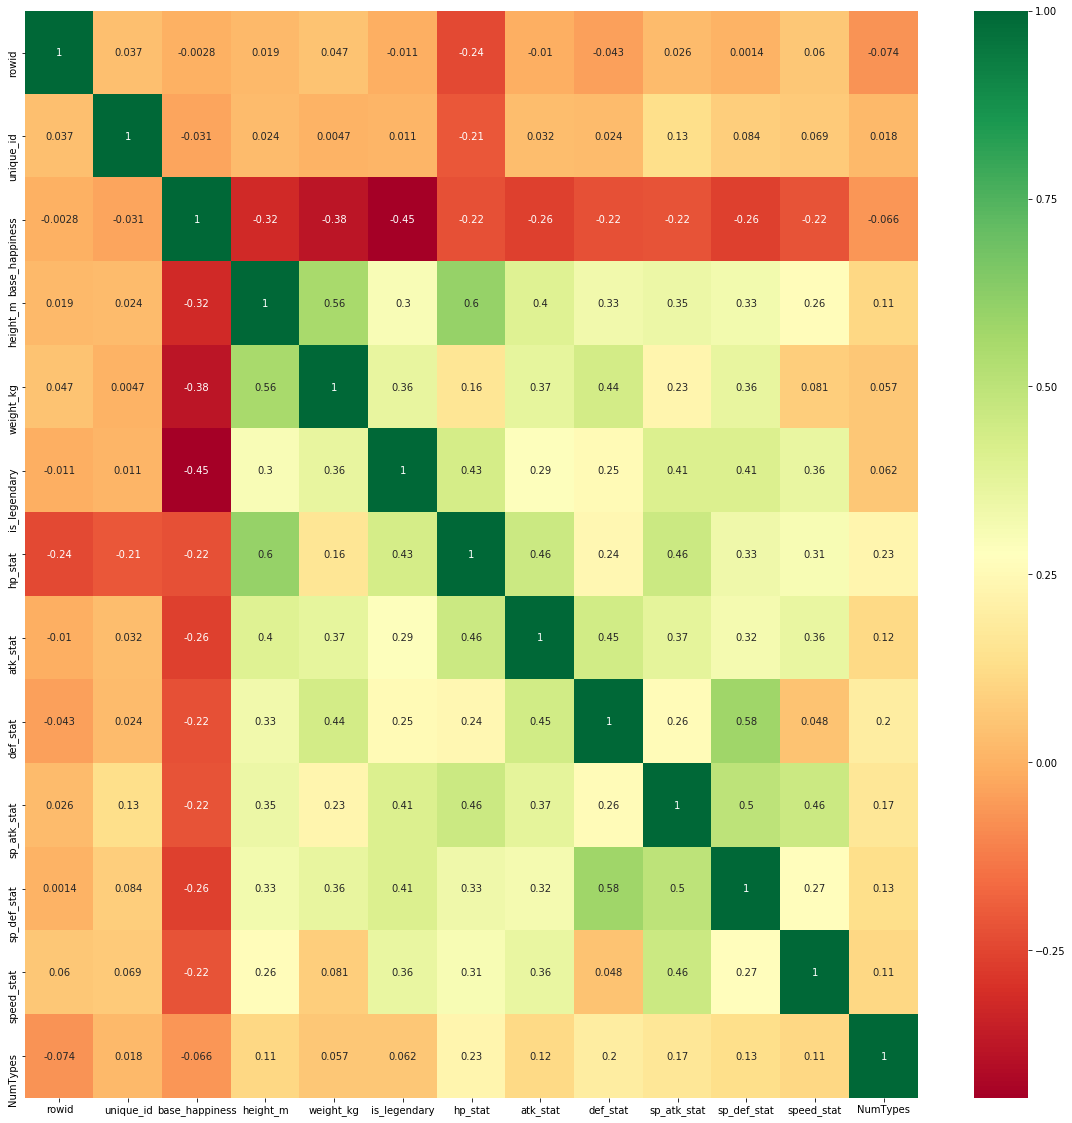

In [369]:
heat(df)